In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM
import minimizer

from costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload

In [2]:
%autoreload

# Example 1

## Generate data

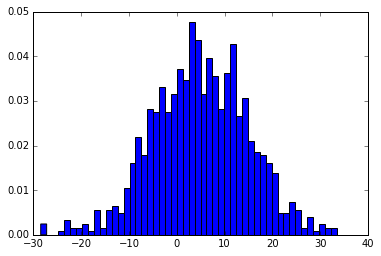

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [3]:
a = RTBM(1,1)

In [4]:
minim = minimizer.CMA(multi_thread=True)

CMA on 4 cpu(s) enabled


In [5]:
solution = minim.train(logarithmic, a, data, tolfun=1e-5)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=1006131, Fri Oct 13 17:15:39 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 3.429561090267675e+04 1.0e+00 1.06e+00  1e+00  1e+00 0:00.0
    2     16 2.101125479605441e+04 1.4e+00 1.22e+00  1e+00  1e+00 0:00.1
    3     24 4.662111553312968e+04 1.7e+00 1.30e+00  1e+00  2e+00 0:00.1
   65    520 4.019440661794868e+03 7.6e+00 2.30e-01  5e-02  2e-01 0:03.1
  100    800 3.717528263218044e+03 6.0e+01 4.45e-02  2e-03  6e-02 0:05.1
  188   1504 3.716387858758480e+03 4.7e+03 4.07e-03  1e-05  1e-02 0:10.1
  200   1600 3.716387690067509e+03 6.8e+03 6.45e-03  1e-05  2e-02 0:10.8
  300   2400 3.716377463154327e+03 3.0e+04 2.02e-01  1e-04  5e-01 0:16.5
  400   3200 3.716358121714260e+03 8.6e+03 1.84e-01  5e-06  2e-02 0:22.0
  500   4000 3.716357828760548e+03 1.5e+04 2.90e-01  1e-06  8e-03 0:27.6
  510   4080 3.716357826712229e+03 1.7e+04 1.86e-01  5e-07  4e-03 0:28.1
CMAEvolutionStrategyResult(xbest=a

## Testing output

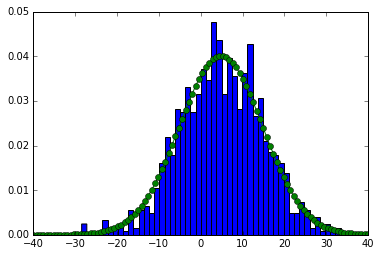

In [7]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

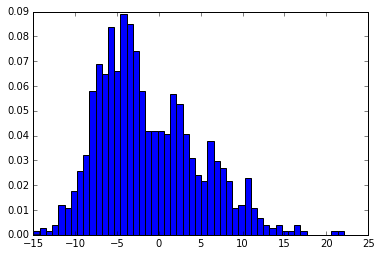

In [8]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [9]:
a = RTBM(1,2)

In [10]:
minim = minimizer.CMA(multi_thread=True)

CMA on 4 cpu(s) enabled


In [11]:
solution = minim.train(logarithmic, a, data, tolfun=1e-5)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=964701, Fri Oct 13 17:17:15 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 2.619141454767938e+04 1.0e+00 8.73e-01  8e-01  9e-01 0:00.1
    2     20 5.918710814429442e+03 1.2e+00 8.10e-01  8e-01  8e-01 0:00.2
    3     30 1.351154535358359e+04 1.4e+00 7.34e-01  7e-01  8e-01 0:00.3
   42    420 4.203024464599541e+03 3.7e+00 4.25e-01  2e-01  5e-01 0:03.3
   95    950 3.359633991087548e+03 4.5e+00 1.62e-01  5e-02  2e-01 0:07.3
  100   1000 3.236335592664546e+03 4.7e+00 1.33e-01  3e-02  1e-01 0:07.8
  161   1610 3.198791486800875e+03 5.3e+01 3.92e-02  3e-03  5e-02 0:13.8
  200   2000 3.193395959475251e+03 1.1e+02 4.04e-02  2e-03  4e-02 0:17.6
  290   2900 3.158191362034751e+03 3.5e+02 1.99e-01  3e-03  1e-01 0:25.7
  300   3000 3.156712511085727e+03 4.8e+02 2.66e-01  3e-03  2e-01 0:26.5
  400   4000 3.150219760760679e+03 6.8e+02 2.09e-02  8e-05  7e-03 0:34.9
  457   4570 3.150219183179689e+03

## Testing output

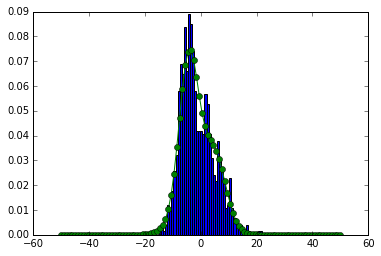

In [12]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')